# Unsepervised Machine Learning: Clustering

## Contents

### Import libraries and data

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [166]:
%matplotlib inline

In [168]:
path = 'C:/Users/rlink/Minimum Wage/02 data'

In [170]:
df = pd.read_csv(os.path.join(path, 'Minimum Wage Data 01.csv'))

In [172]:
df.shape

(2862, 15)

In [174]:
df.columns

Index(['Year', 'State', 'State.Minimum.Wage',
       'State.Minimum.Wage.2020.Dollars', 'Federal.Minimum.Wage',
       'Federal.Minimum.Wage.2020.Dollars', 'Effective.Minimum.Wage',
       'Effective.Minimum.Wage.2020.Dollars', 'CPI.Average',
       'Department.Of.Labor.Uncleaned.Data',
       'Department.Of.Labor.Cleaned.Low.Value',
       'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars',
       'Department.Of.Labor.Cleaned.High.Value',
       'Department.Of.Labor.Cleaned.High.Value.2020.Dollars', 'Footnote'],
      dtype='object')

In [176]:
df.head()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


In [178]:
df.rename(columns = {'State.Minimum.Wage' : 'st min wage', 'State.Minimum.Wage.2020.Dollars': 'st min wage 2020', 'Federal.Minimum.Wage': 'fed min wage', 'Federal.Minimum.Wage.2020.Dollars': 'fed min wage 2020', 'Effective.Minimum.Wage': 'eff min wage', 'Effective.Minimum.Wage.2020.Dollars' : 'eff min wage 2020', 'CPI.Average' : 'cpi ave', 'Department.Of.Labor.Uncleaned.Data' : 'DoL uncleaned data', 'Department.Of.Labor.Cleaned.Low.Value' : 'DoL cleaned low', 'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars' : 'DoL cleaned low 2020', 'Department.Of.Labor.Cleaned.High.Value' : 'DoL cleaned high', 'Department.Of.Labor.Cleaned.High.Value.2020.Dollars' : 'DoL cleaned high 2020'}, inplace = True)

In [180]:
df.columns

Index(['Year', 'State', 'st min wage', 'st min wage 2020', 'fed min wage',
       'fed min wage 2020', 'eff min wage', 'eff min wage 2020', 'cpi ave',
       'DoL uncleaned data', 'DoL cleaned low', 'DoL cleaned low 2020',
       'DoL cleaned high', 'DoL cleaned high 2020', 'Footnote'],
      dtype='object')

## Elbow technique

In [183]:
var_inc = ['eff min wage 2020', 'cpi ave']

In [185]:
df_sub = df[var_inc]

In [187]:
df_sub.shape

(2862, 2)

In [189]:
### Standardize data

In [191]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_sub)

In [193]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [195]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]

In [196]:
score

[-5723.999999999991,
 -3033.6803826670334,
 -1940.170708049015,
 -1514.9449437365092,
 -1251.5611078713957,
 -920.7785787804307,
 -813.896280352718,
 -695.5245452042307,
 -648.7821729346101]

### Plot the elbow curve using PyLab.

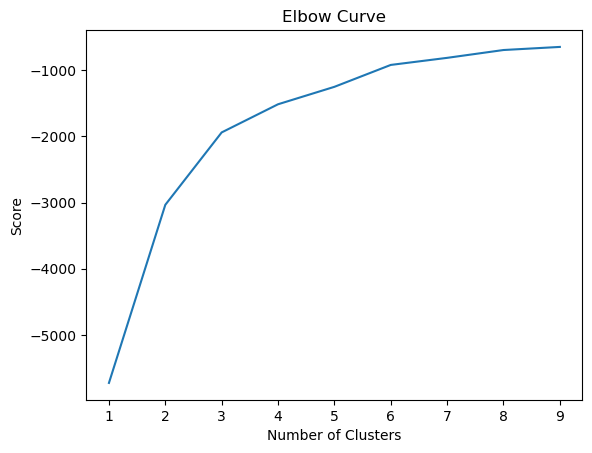

In [200]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on this chart I believe that the optimal number of clusters is 3. While there is some flattening at 2, I think that four is a better number to use because the flattening is significantly more pronounced.

In [203]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, random_state=42)
silhouette_score(df_scaled, kmeans.fit_predict(df_scaled))

0.4705974410497685

#### I ran the silhouette algaorithm for 2 -6 clusters. The coefficient for 3 (0.47059) is the closest to 1, even though it is not very close. Therefore, I conclude that it is the optimum number of clusters to examine.

### Create the k-means object

In [207]:
kmeans = KMeans(n_clusters = 3) 

### Fit the k-means object to the data

In [210]:
kmeans.fit(df_scaled)

KMeans(n_clusters=3)

In [212]:
kmeans = KMeans(n_clusters=3, random_state=None, n_init=10)

In [214]:
# Add the cluster labels to the original dataframe and to the subset
df['Cluster'] = kmeans.fit_predict(df_scaled)
df_sub['Cluster'] = kmeans.fit_predict(df_scaled)

C:\Users\rlink\AppData\Local\Temp\ipykernel_7456\1305691014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Cluster'] = kmeans.fit_predict(df_scaled)


In [216]:
# Verify cluster assignment
print(df_sub.head())

   eff min wage 2020  cpi ave  Cluster
0               8.55     34.8        1
1              15.61     34.8        1
2               8.55     34.8        1
3               8.55     34.8        1
4              12.26     34.8        1


In [218]:
df_sub['clusters'] = kmeans.fit_predict(df_scaled)

C:\Users\rlink\AppData\Local\Temp\ipykernel_7456\1811275590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_scaled)


### Plot the clusters for the "eff min wage 2020" and the "cpi ave" variables

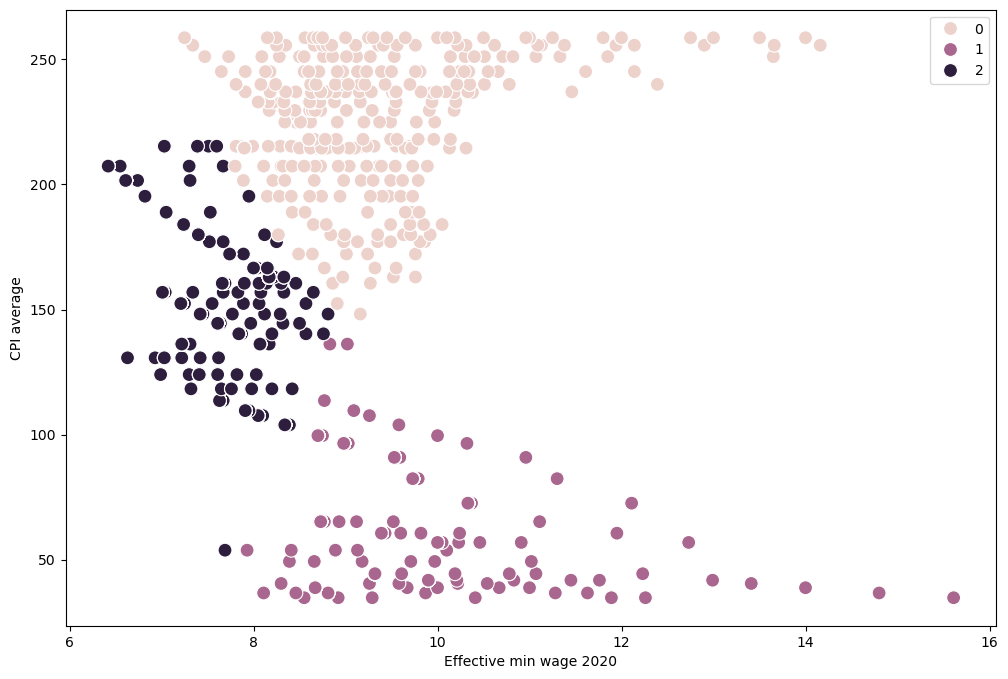

In [221]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['eff min wage 2020'], y=df_sub['cpi ave'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Effective min wage 2020') # Label x-axis.
plt.ylabel('CPI average') # Label y-axis.
plt.show()

In [222]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'black'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\rlink\AppData\Local\Temp\ipykernel_7456\113952831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'black'


In [225]:
df_sub.groupby('cluster').agg({'eff min wage 2020':['mean', 'median'], 
                          'cpi ave':['mean', 'median']})

eff min wage 2020            cpi ave         
                     mean median        mean   median
cluster                                              
black            7.499736   7.52  147.780802  148.200
pink             8.708788   8.55  229.205539  232.957
purple           9.332676   9.32   61.099635   56.900

## How and why the clusters make sense

I went back and forth on choosing the number of clusters from 2 - 4. I finally settled at 3. While the elbow starts to really bend at 2, and it flattens signifficantly at 4; the point at 3 seems to be an inflection point. I looked at the graphics of all 3, and it seems to make the most sense (at least to me). 

The clusters make sense in that they show a striation as the CPI increases. From there, though, there is not a lot that show any correlations. Cluster 0 is high CPI with low minimum wage. Cluster 1 shows low CPI with high minimum wage. Finally, cluster 2 shows high CPI with high minimum wages.

In many states, there is no mandated minimum wage, or it was legislated at a later date. This affects the kmeans algorythm. State minimum wages seem to form a C or U shaped curve showing that minimum wage increases substantially when CPI is low and at other times it increases a lot when CPI is high. In many cases it does not increase at all as CPI changes. There does not seem to be any strong relationship between the state minium wage and CPI.

Federal minimum wage is even more confusing as it seems to show that minimum wage increases as CPI is relatively small. In other words it shows that when inflation is tame minimum wages increases more; but when inflation is high then minimum wage increases very little. Further, the correlation is very week.

While the effective minimum wage (combining state and federal) seems to look similar to the state minimum wage it is clear that at times of both high and low inflation minimum wage may increase or decrease. 

My conclusion is that there must be other factors that affect changes in minimum wage besides inflation. In fact, it seems that inflation has very little to do with changes in the minimum wage rate.

It would be good to explore other factors to determine why minimum wages change over time. Some ideas are political: election years, which party has majorities in legislatures, which party the executive belongs to. Other ideas may be econimic: unemployment rate, housing prices, food and/or other staples prices.